In [1]:
# kedro jupyter lab/notebook --env base

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Load ads dataset

In [10]:
df = context.catalog.load('sql-ads')
df.shape

2021-01-06 14:45:23,972 - kedro.io.data_catalog - INFO - Loading data from `sql-ads` (SQLTableDataSet)...


(98390, 61)

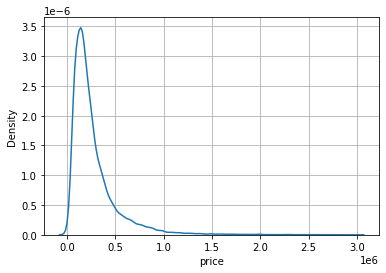

In [11]:
# Plot price distribution 
sns.kdeplot(df.price, label='with')
plt.grid(True)

In [12]:
#nb of extrem values exclude (mean+3*std ~ 1037763)
value = 2e6
print(f"nb of extrem values exclude : {df.query(f'price > {value}').shape}")

#extrem values
value = 2e6
df = df.query(f'price < {value}')
df.shape

nb of extrem values exclude : (226, 61)


(98155, 61)

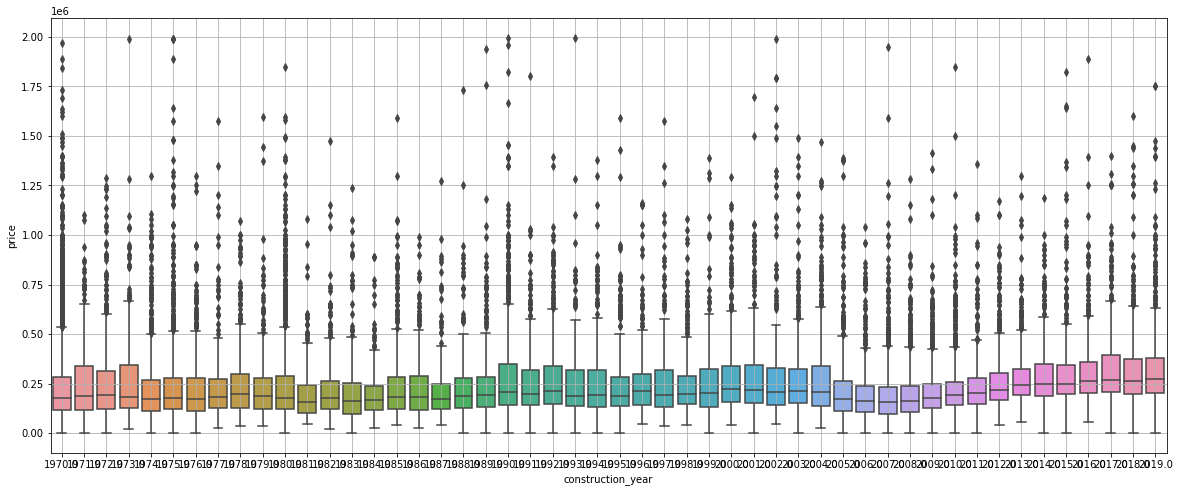

In [11]:
# Contruction year crossed with price analysis
plt.subplots(figsize=(20,8))
sns.boxplot(x="construction_year", y="price", data=df[df.construction_year.isin(range(1970, 2020))])
plt.grid(True)

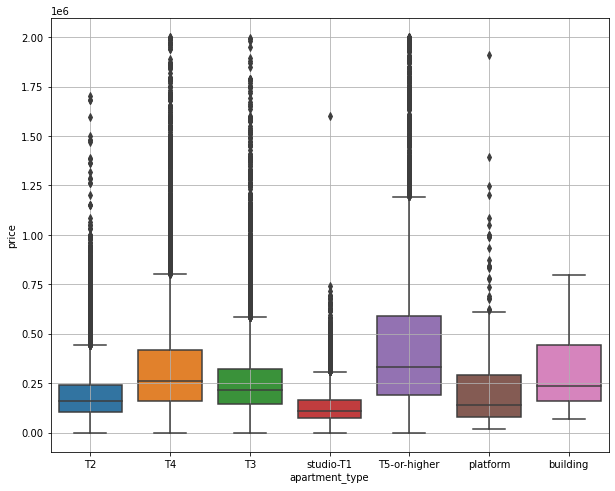

In [12]:
# Type d'appartemnt 
plt.subplots(figsize=(10,8))
sns.boxplot(x="apartment_type", y="price", data=df)
plt.grid(True)

In [14]:
df.columns

Index(['id', 'parution_date', 'iris_insee_code', 'city_insee_code',
       'postal_code', 'price', 'price_without_agency_fees', 'via_agency',
       'buyer_pays_fees', 'seller_pays_fees', 'condominium_fees', 'land_fees',
       'tenant_in_place', 'is_under_1948_law', 'is_auction',
       'construction_year', 'habitation_type', 'total_surface',
       'carrez_surface', 'terrace_surface', 'balcony_surface',
       'garden_surface', 'cellar_surface', 'n_rooms', 'n_bedrooms',
       'n_bathrooms', 'n_wcs', 'n_service_rooms', 'has_terrace', 'has_balcony',
       'has_garden', 'has_parking', 'has_cellar', 'has_box', 'has_elevator',
       'has_swimming_pool', 'has_intercom', 'has_chimney', 'heating_type',
       'heating_nature', 'kitchen_nature', 'has_equipped_kitchen',
       'has_double_glazing', 'orientation', 'has_great_view',
       'energetic_performance_diagnostic_code',
       'greenhouse_gaz_diagnostic_code',
       'energetic_performance_diagnostic_value',
       'greenhouse_gaz_d

In [16]:
# Analyse du nb de chambres vs type apartment
if 0:
    for j in df.apartment_type.unique():
        tmp = df[df.apartment_type==j]
        #j='all_type'
        print('------\n',j,',',tmp.shape)
        print(tmp.n_bedrooms.value_counts())
        #print(tmp.n_rooms.value_counts())
        print(j,',',tmp.shape)

In [15]:
# Analyse du nb de pièces vs type apartment
if 0:
    for j in df.apartment_type.unique():
        tmp = df[df.apartment_type==j]
        #j='all_type'
        print('------\n',j,',',tmp.shape)
        print(tmp.n_rooms.value_counts())
        print(j,',',tmp.shape)

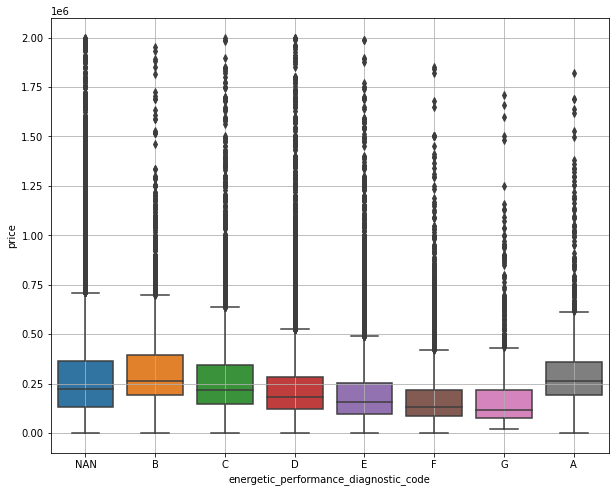

In [31]:
# Type d'appartemnt 
plt.subplots(figsize=(10,8))
sns.boxplot(x="energetic_performance_diagnostic_code", y="price", data=df)
plt.grid(True)

T2 , (72593, 62)
has_terrace
has_balcony
has_garden
has_garden  failed
has_parking
has_cellar
has_box
has_elevator
has_swimming_pool
has_intercom
has_chimney
has_caretaker
is_senior_residence
T4 , (63563, 62)
has_terrace
has_balcony
has_garden
has_garden  failed
has_parking
has_cellar
has_box
has_elevator
has_swimming_pool
has_intercom


<ipython-input-66-1f88319d009e>:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


has_chimney
has_caretaker
is_senior_residence
T3 , (103228, 62)
has_terrace
has_balcony
has_garden
has_garden  failed
has_parking
has_cellar
has_box
has_elevator
has_swimming_pool
has_intercom
has_chimney
has_caretaker
is_senior_residence
studio-T1 , (26360, 62)
has_terrace
has_balcony
has_garden
has_garden  failed
has_parking
has_cellar
has_box
has_elevator
has_swimming_pool
has_intercom
has_chimney
has_caretaker
is_senior_residence
T5-or-higher , (28774, 62)
has_terrace
has_balcony
has_garden
has_garden  failed
has_parking
has_cellar
has_box
has_elevator
has_swimming_pool
has_intercom
has_chimney
has_caretaker
is_senior_residence
platform , (882, 62)
has_terrace
has_balcony
has_garden
has_garden  failed
has_parking
has_cellar
has_box
has_elevator
has_swimming_pool
has_intercom
has_chimney
has_caretaker
is_senior_residence
building , (100, 62)
has_terrace
has_balcony
has_garden
has_garden  failed
has_parking
has_cellar
has_box
has_elevator
has_swimming_pool
has_intercom
has_chimney
ha

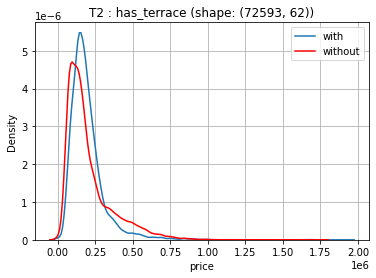

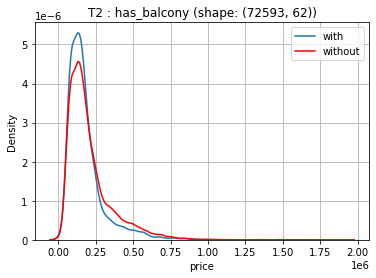

<Figure size 432x288 with 0 Axes>

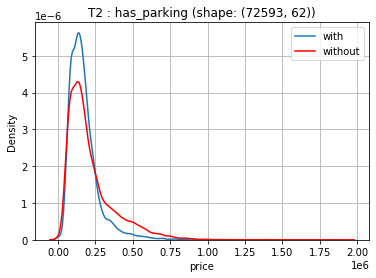

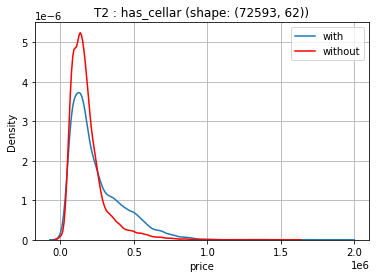

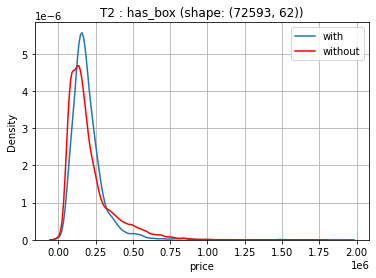

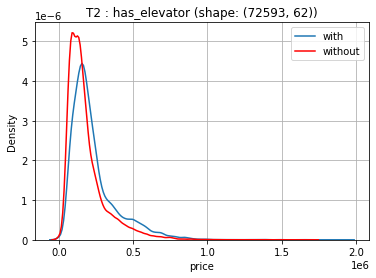

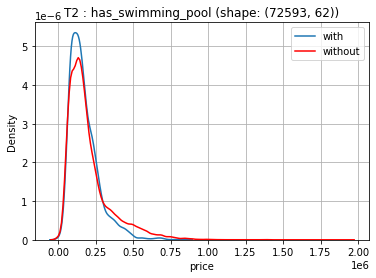

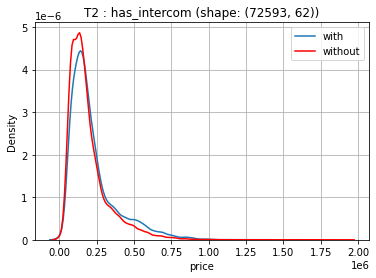

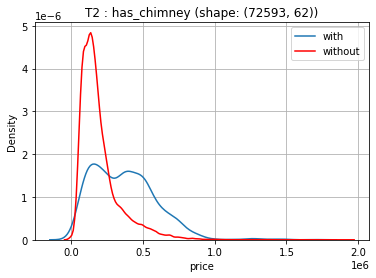

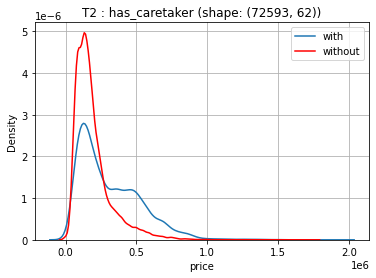

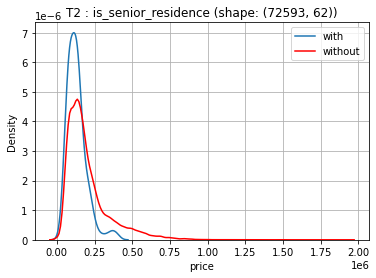

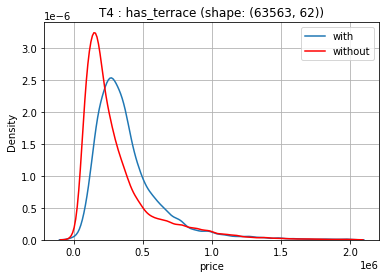

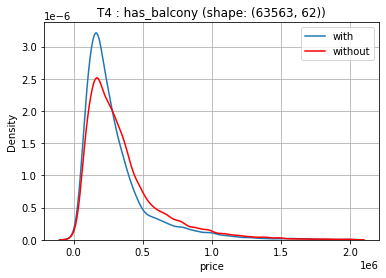

<Figure size 432x288 with 0 Axes>

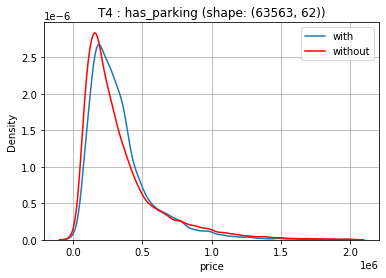

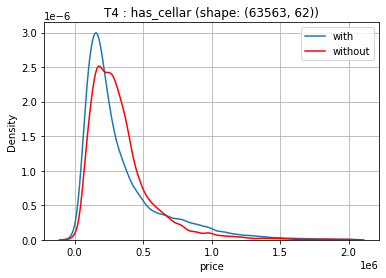

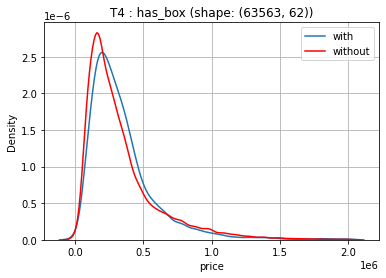

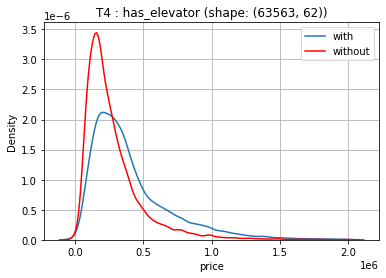

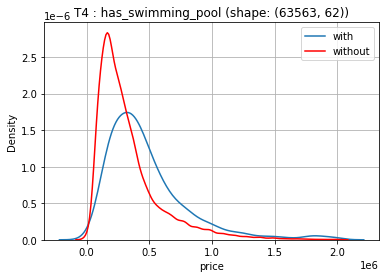

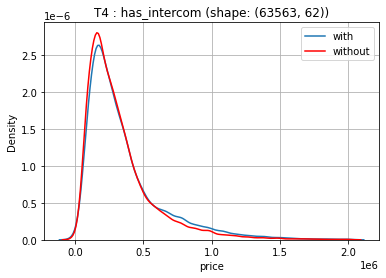

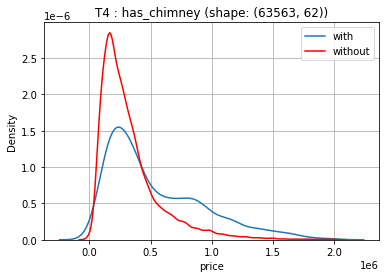

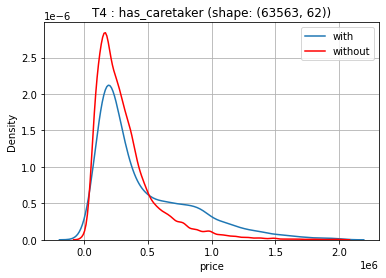

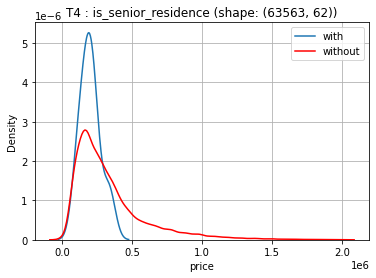

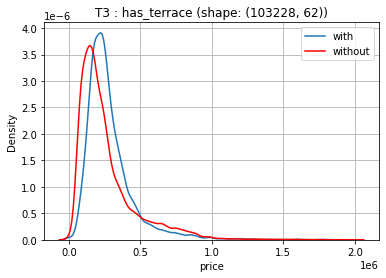

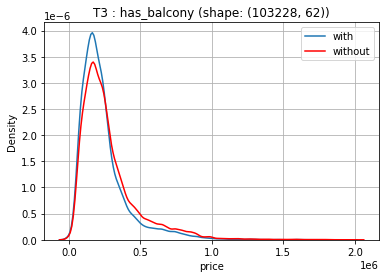

<Figure size 432x288 with 0 Axes>

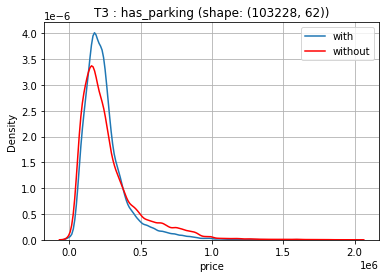

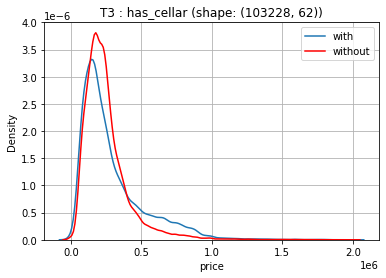

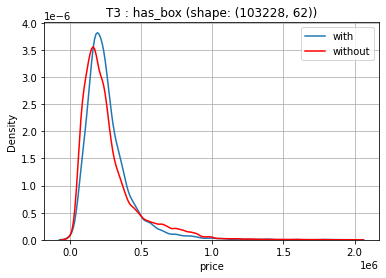

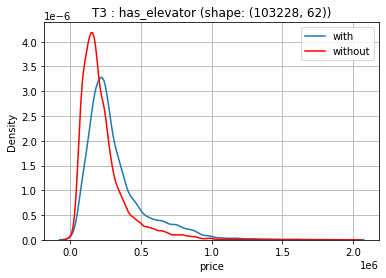

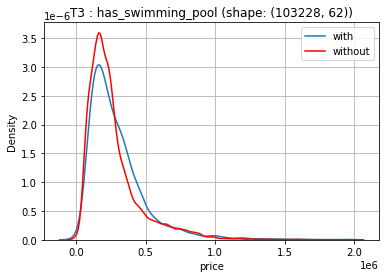

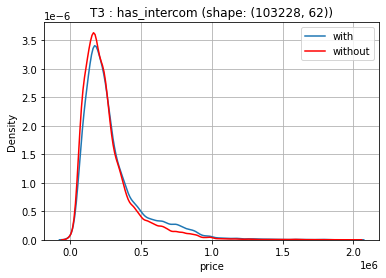

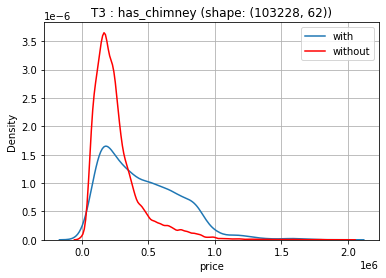

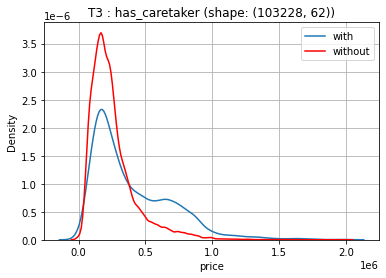

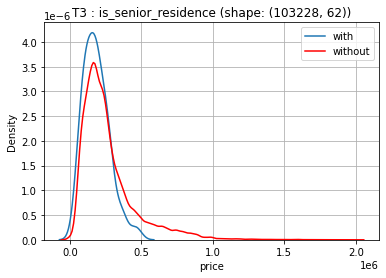

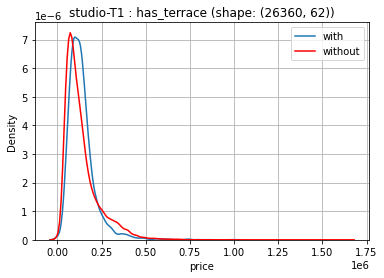

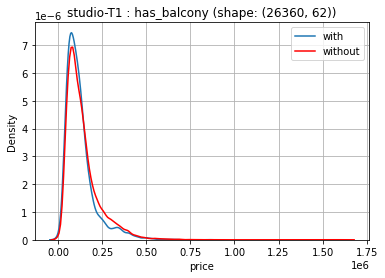

<Figure size 432x288 with 0 Axes>

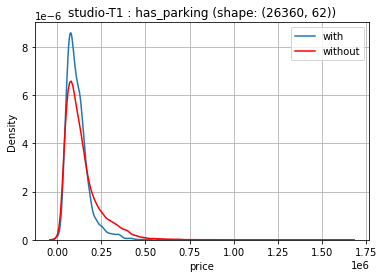

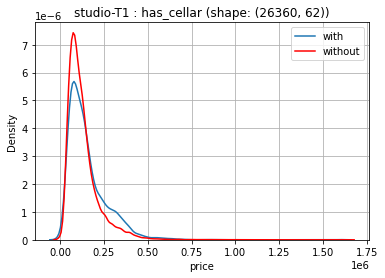

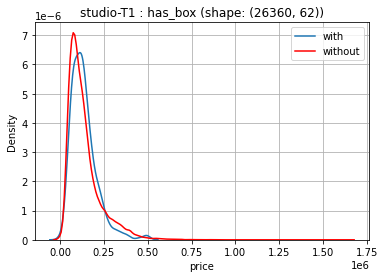

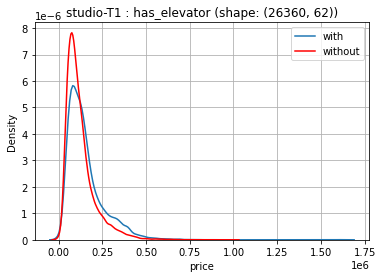

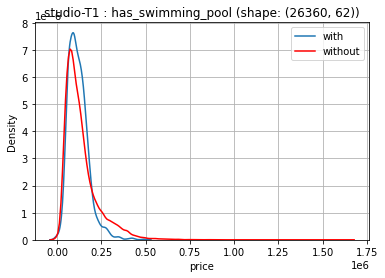

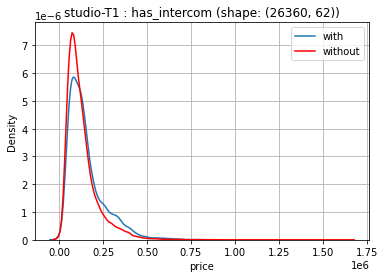

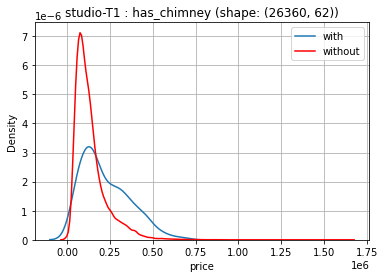

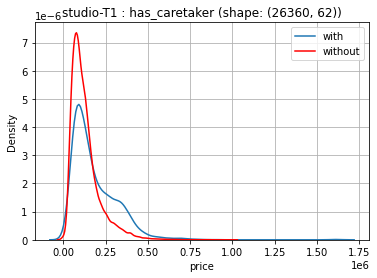

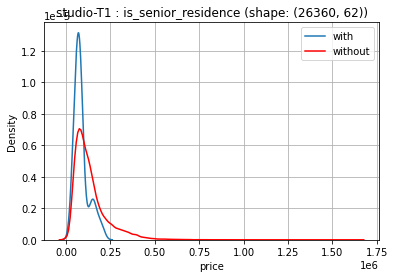

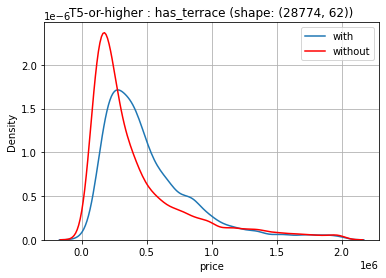

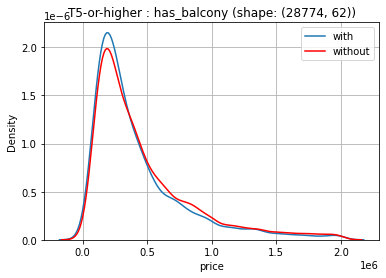

<Figure size 432x288 with 0 Axes>

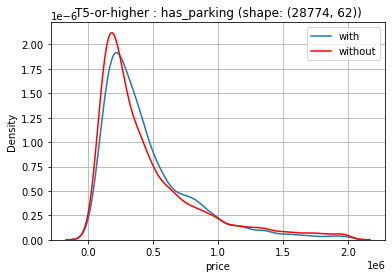

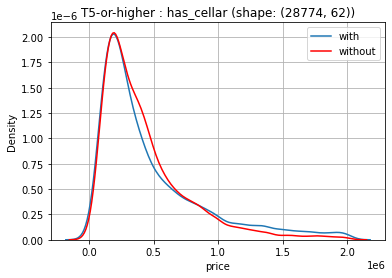

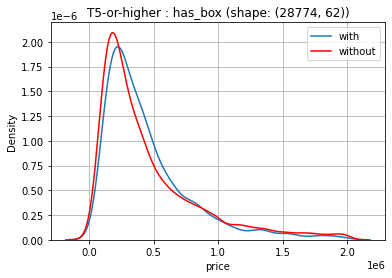

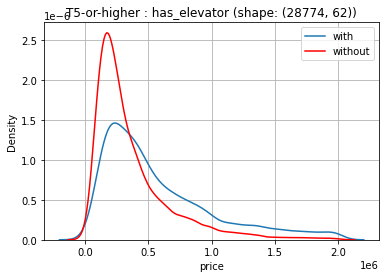

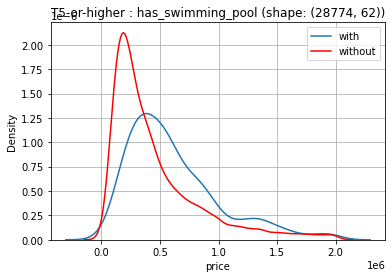

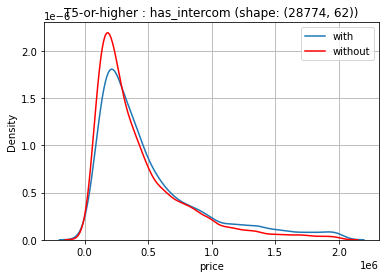

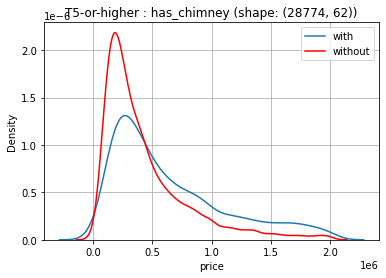

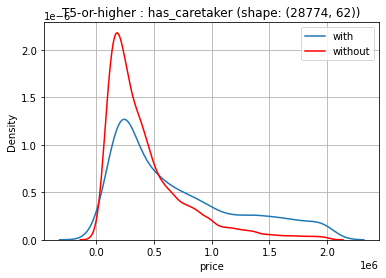

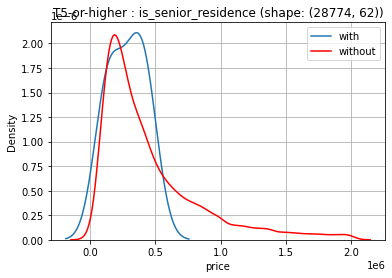

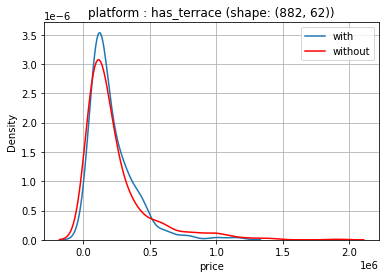

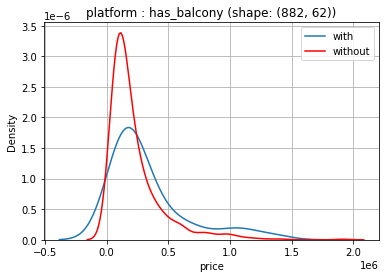

<Figure size 432x288 with 0 Axes>

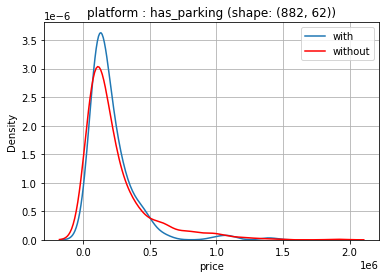

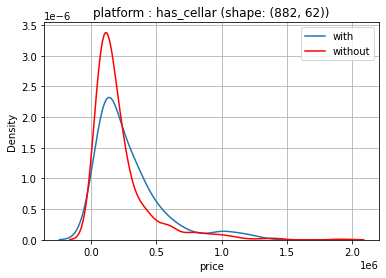

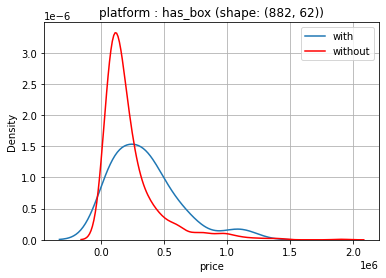

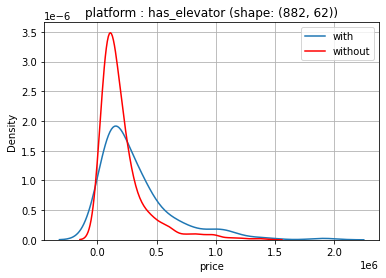

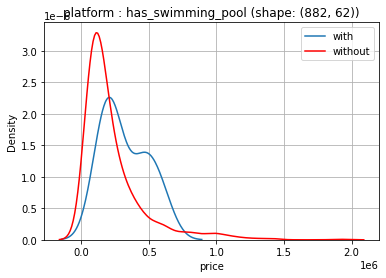

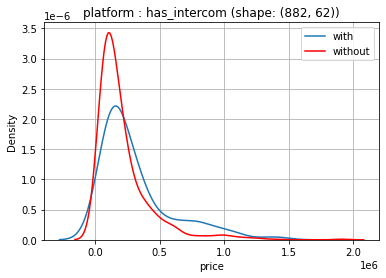

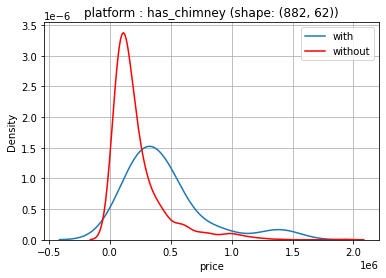

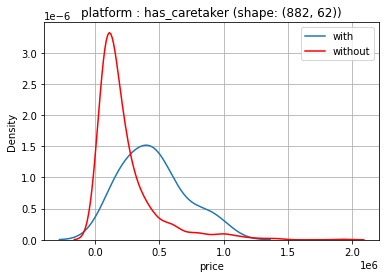

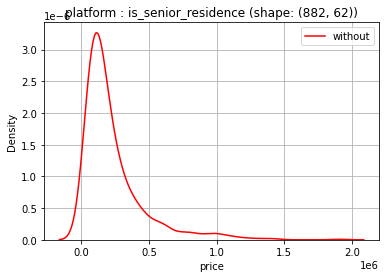

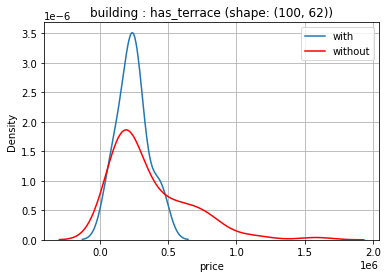

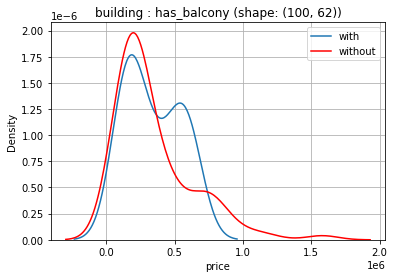

<Figure size 432x288 with 0 Axes>

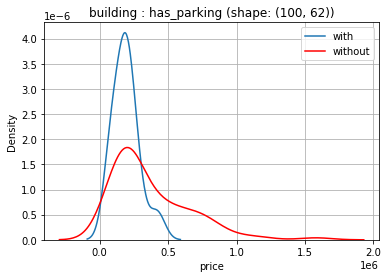

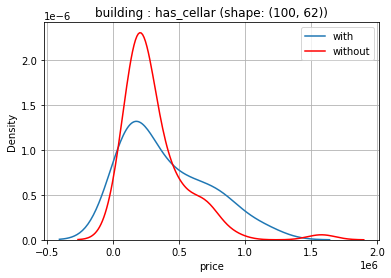

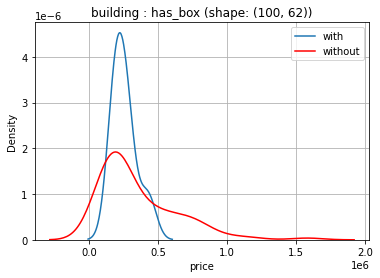

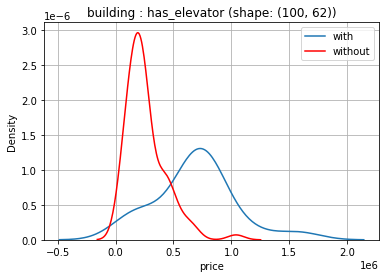

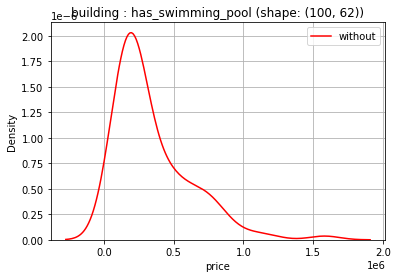

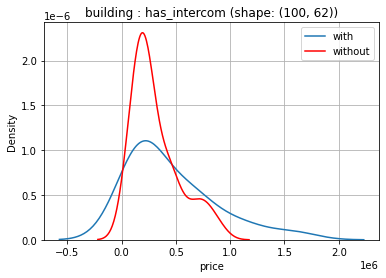

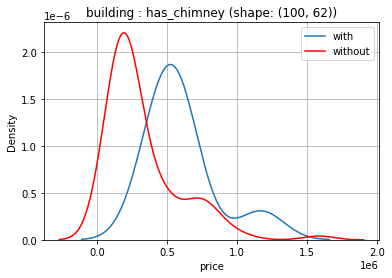

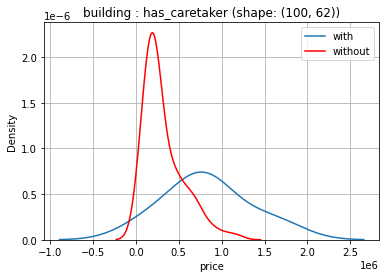

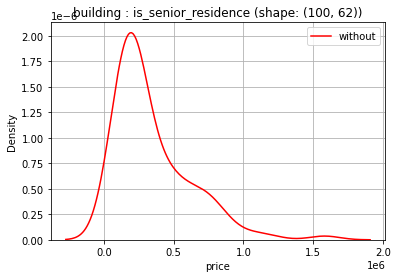

In [66]:
# Analyse distribution du prix de qq variables binaires 
for j in tmp_.apartment_type.unique():
    tmp = tmp_[tmp_.apartment_type==j]
    #j='all_type'
    print(j,',',tmp.shape)
    for i in ['has_terrace', 'has_balcony',
           'has_garden', 'has_parking', 'has_cellar', 'has_box', 'has_elevator',
           'has_swimming_pool', 'has_intercom', 'has_chimney', 'has_caretaker', 'is_senior_residence']:
        print(i)
        try : 
            plt.figure()
            sns.kdeplot(tmp[tmp[i]].price, label='with')#, alpha=0.2)
            sns.kdeplot(tmp[~tmp[i]].price, color='red', label='without')#, alpha=0.2)
            plt.legend()
            plt.title(f'{j} : {i} (shape: {tmp.shape})')
            plt.grid(True)
            #plt.savefig(f'fig/{j}_{i}.png')
        except: 
            print(i, ' failed')

# Choix de quelques features (+ intégrer prix m2 via city_insee_code)

In [219]:
features_v0 = ['apartment_type','has_terrace','has_swimming_pool','has_chimney','has_elevator','carrez_surface']

In [231]:
tmp_.filter(items=['id','city_insee_code', 'price'] + features_v0).head(5)

,id,city_insee_code,price,apartment_type,has_terrace,has_swimming_pool,has_chimney,has_elevator,carrez_surface,n_floors_building
1,634705,84035,86000.0,T2,False,False,False,True,38.0,3.0
2,1205876,66124,93960.0,T2,True,False,False,False,50.0,4.0
3,791463,94041,340000.0,T4,False,True,False,False,58.0,4.0
4,728838,56121,176800.0,T3,False,False,False,True,80.0,10.0
5,635047,13208,193000.0,studio-T1,True,False,False,True,37.3,NaN


# Data Cleaning (features selected)

In [12]:
df.apartment_type.value_counts()

T3              34646
T2              24495
T4              21372
T5-or-higher     9889
studio-T1        8901
platform          315
building           37
Name: apartment_type, dtype: int64

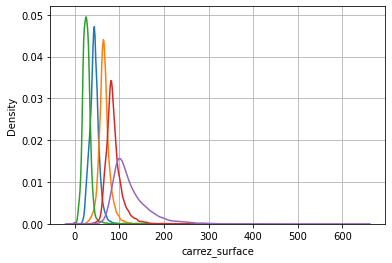

In [15]:
sns.kdeplot(df[df.apartment_type == 'T2'].carrez_surface)
sns.kdeplot(df[df.apartment_type == 'T3'].carrez_surface)
sns.kdeplot(df[df.apartment_type == 'studio-T1'].carrez_surface)
sns.kdeplot(df[df.apartment_type == 'T4'].carrez_surface)
sns.kdeplot(df[df.apartment_type == 'T5-or-higher'].carrez_surface)
plt.grid(True)

In [27]:
df.apartment_type.value_counts().index

Index(['T3', 'T2', 'T4', 'T5-or-higher', 'studio-T1', 'platform', 'building'], dtype='object')

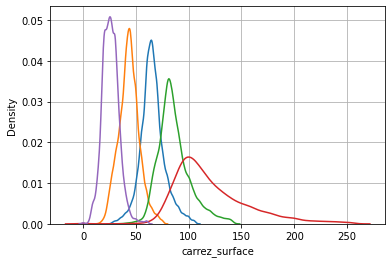

In [28]:
for i in ['T3', 'T2', 'T4', 'T5-or-higher', 'studio-T1']:
    tmp = df[df.apartment_type == i]

    value_max = tmp.carrez_surface.mean() + 2 * tmp.carrez_surface.std()
    value_min = tmp.carrez_surface.mean() - 2 * tmp.carrez_surface.std()

    sns.kdeplot(tmp[(tmp.carrez_surface < value_max) & (tmp.carrez_surface > value_min)].carrez_surface)
plt.grid(True)

In [79]:
df = df.head(10)
df = df[['id', 'carrez_surface', 'apartment_type']]

In [80]:
df.shape

(10, 3)

In [81]:
res = pd.DataFrame()
res = res.append(df.query("apartment_type in ['platform', 'building']"))
res.shape

for i in ['studio-T1','T3', 'T2', 'T4', 'T5-or-higher']:
    tmp = df.query(f"apartment_type.str.contains('{i}')")

    value_max = tmp.carrez_surface.mean() + 3 * tmp.carrez_surface.std()
    value_min = tmp.carrez_surface.mean() - 3 * tmp.carrez_surface.std()

    res = res.append(tmp[(tmp.carrez_surface < value_max) & (tmp.carrez_surface > value_min)])
res.drop_duplicates(inplace=True)

In [82]:
res.to_dict()

{'id': {1: 634705,
  2: 1205876,
  7: 634769,
  8: 635059,
  3: 791463,
  6: 635048,
  0: 95,
  9: 357696},
 'carrez_surface': {1: 38.0,
  2: 50.0,
  7: 52.4,
  8: 64.0,
  3: 58.0,
  6: 92.0,
  0: 425.0,
  9: 120.65},
 'apartment_type': {1: 'T2',
  2: 'T2',
  7: 'T2',
  8: 'T2',
  3: 'T4',
  6: 'T4',
  0: 'T5-or-higher',
  9: 'T5-or-higher'}}